In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import warnings; warnings.simplefilter('ignore')
from evaluation import *

# Generate master pred csv for public and private test sets

In [2]:
public_mapping_csv_path = '/home/yue3/CSAW-M-review_preds/labels/CSAW-M_filename_mapping_testing.csv'
public_label_csv_path = '/home/yue3/CSAW-M-review_preds/labels/CSAW-M_test.csv'
public_multihot_pred_path = '/home/yue3/CSAW-M-review_preds/before_review/multihot_baseline_3-1_final_public_test_20210604.csv'
public_softmax_pred_path = '/home/yue3/CSAW-M-review_preds/before_review/softmax_baseline_3-1_final_public_test_20210604.csv'

public_df = make_master_pred_csv(public_mapping_csv_path, public_label_csv_path, public_multihot_pred_path, public_softmax_pred_path)
public_df

,Filename,Label,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,If_cancer,If_interval_cancer,If_large_invasive_cancer,...,final_pred_softmax_1,final_score_softmax_1,final_pred_softmax_2,final_score_softmax_2,final_pred_softmax_3,final_score_softmax_3,final_pred_softmax_4,final_score_softmax_4,final_pred_softmax_5,final_score_softmax_5
0,test_1.png,4,4,1,3,4,5,0,0,0,...,3,0.369708,3,0.334078,3,0.352861,4,0.360887,4,0.354106
1,test_2.png,5,5,4,3,5,5,1,1,1,...,4,0.436586,4,0.375917,4,0.401142,3,0.422172,3,0.352862
2,test_3.png,8,8,8,6,8,4,1,0,0,...,8,0.845576,8,0.833256,8,0.848791,8,0.835598,8,0.820799
3,test_4.png,6,5,6,7,6,5,0,0,0,...,4,0.510477,4,0.456911,5,0.513239,4,0.474639,4,0.459291
4,test_5.png,6,5,6,7,8,4,0,0,0,...,4,0.432414,4,0.400916,4,0.390921,4,0.380318,3,0.380024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,test_493.png,6,7,6,3,8,4,0,0,0,...,5,0.677086,8,0.677760,8,0.702728,5,0.659582,5,0.644785
493,test_494.png,5,6,5,5,8,4,0,0,0,...,5,0.622508,5,0.616857,5,0.600555,4,0.588096,5,0.614443
494,test_495.png,3,4,2,3,4,3,0,0,0,...,2,0.183186,2,0.169221,2,0.188240,2,0.199907,2,0.195154
495,test_496.png,7,8,7,6,7,7,0,0,0,...,8,0.712283,8,0.702942,8,0.705254,8,0.727376,5,0.669297


In [3]:
private_mapping_csv_path = '/home/yue3/CSAW-M-review_preds/labels/CSAW-M_filename_mapping_private.csv'
private_label_csv_path = '/home/yue3/CSAW-M-review_preds/labels/CSAW-M_private.csv'
private_multihot_pred_path = '/home/yue3/CSAW-M-review_preds/before_review/multihot_baseline_3-1_final_private_test_20210604.csv'
private_softmax_pred_path = '/home/yue3/CSAW-M-review_preds/before_review/softmax_baseline_3-1_final_private_test_20210604.csv'

private_df = make_master_pred_csv(private_mapping_csv_path, private_label_csv_path, private_multihot_pred_path, private_softmax_pred_path)
private_df

,Filename,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,If_cancer,If_interval_cancer,If_large_invasive_cancer,If_composite,...,final_pred_softmax_1,final_score_softmax_1,final_pred_softmax_2,final_score_softmax_2,final_pred_softmax_3,final_score_softmax_3,final_pred_softmax_4,final_score_softmax_4,final_pred_softmax_5,final_score_softmax_5
0,private_1.png,321,388,407,327,201,1,0,0,0,...,6,0.695442,6,0.692052,6,0.691982,8,0.713099,6,0.676593
1,private_2.png,72,236,57,218,80,1,0,1,1,...,4,0.451249,4,0.445096,4,0.431995,4,0.420622,4,0.442789
2,private_3.png,244,231,11,403,494,1,1,0,1,...,5,0.562080,5,0.557815,4,0.556553,4,0.543189,4,0.547489
3,private_4.png,30,17,30,28,13,0,0,0,0,...,2,0.224576,2,0.193673,2,0.200577,2,0.222148,1,0.246102
4,private_5.png,73,89,35,6,16,1,1,0,1,...,2,0.207389,2,0.218514,2,0.204828,2,0.204529,2,0.230849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,private_471.png,179,155,91,197,91,0,0,0,0,...,3,0.341549,2,0.325084,3,0.321822,4,0.373113,2,0.315988
471,private_472.png,11,50,142,16,70,1,0,1,1,...,1,0.206180,2,0.158986,2,0.207732,2,0.221830,2,0.215111
472,private_473.png,470,336,268,358,463,1,0,0,0,...,8,0.740333,8,0.756445,8,0.743466,8,0.754339,8,0.740251
473,private_474.png,185,213,177,280,197,0,0,0,0,...,5,0.571749,5,0.546040,5,0.555441,5,0.586824,5,0.545798


# Comparison of expert and model performance on ordinal classification of masking potentialfor the public test set.

## kendall

In [4]:
get_table_metric(public_df, 'kendall', if_highlight=True, bin_list1=False, bin_list2=False)

,,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,Softmax_mean,Multi-hot_mean,Softmax,Multi-hot
0,GT-Median,0.723200,0.727900,0.545000,0.555400,0.634200,0.724500,0.762700,0.7245 +- 0.0041,0.7627 +- 0.0038
1,Expert_1,nan,0.556800,0.382200,0.367600,0.501400,0.650500,0.677200,0.6505 +- 0.0027,0.6772 +- 0.0027
2,Expert_2,0.556800,nan,0.350700,0.399000,0.510500,0.661100,0.692200,0.6611 +- 0.0083,0.6922 +- 0.0050
3,Expert_3,0.382200,0.350700,nan,0.319900,0.305400,0.397300,0.425900,0.3973 +- 0.0067,0.4259 +- 0.0044
4,Expert_4,0.367600,0.399000,0.319900,nan,0.317900,0.440200,0.475000,0.4402 +- 0.0095,0.4750 +- 0.0084
5,Expert_5,0.501400,0.510500,0.305400,0.317900,nan,0.568600,0.599800,0.5686 +- 0.0126,0.5998 +- 0.0016


## amae

In [5]:
get_table_metric(public_df, 'amae', if_highlight=True, bin_list1=False, bin_list2=False)

,,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,Softmax_mean,Multi-hot_mean,Softmax,Multi-hot
0,GT-Median,0.676200,0.716700,1.003700,1.039000,1.032100,0.797200,0.718700,0.7972 +- 0.0206,0.7187 +- 0.0151
1,Expert_1,nan,1.282600,1.621400,1.623900,1.401900,1.087600,1.044300,1.0876 +- 0.0106,1.0443 +- 0.0151
2,Expert_2,1.322800,nan,1.695000,1.643100,1.412800,1.125900,1.072800,1.1259 +- 0.0167,1.0728 +- 0.0099
3,Expert_3,1.588400,1.685900,nan,1.664900,1.719100,1.538700,1.373900,1.5387 +- 0.0230,1.3739 +- 0.0176
4,Expert_4,1.557400,1.534700,1.679800,nan,1.627000,1.393900,1.293900,1.3939 +- 0.0251,1.2939 +- 0.0260
5,Expert_5,1.220600,1.369500,1.834400,1.698200,nan,1.084000,1.035100,1.0840 +- 0.0509,1.0351 +- 0.0254


## low bin f1

In [6]:
get_table_metric(public_df, 'lowbinf1', if_highlight=True, bin_list1=False, bin_list2=False)

,,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,Softmax_mean,Multi-hot_mean,Softmax,Multi-hot
0,GT-Median,0.794000,0.746500,0.736300,0.543000,0.688500,0.790400,0.807200,0.7904 +- 0.0082,0.8072 +- 0.0075
1,Expert_1,nan,0.686400,0.577100,0.411800,0.623800,0.773500,0.770400,0.7735 +- 0.0108,0.7704 +- 0.0044
2,Expert_2,0.686400,nan,0.593600,0.425500,0.572700,0.799500,0.781300,0.7995 +- 0.0137,0.7813 +- 0.0117
3,Expert_3,0.577100,0.593600,nan,0.392200,0.475700,0.631800,0.637800,0.6318 +- 0.0103,0.6378 +- 0.0064
4,Expert_4,0.411800,0.425500,0.392200,nan,0.350600,0.446900,0.454500,0.4469 +- 0.0094,0.4545 +- 0.0114
5,Expert_5,0.623800,0.572700,0.475700,0.350600,nan,0.656600,0.636500,0.6566 +- 0.0121,0.6365 +- 0.0077


## high bin f1

In [7]:
get_table_metric(public_df, 'highbinf1', if_highlight=True, bin_list1=False, bin_list2=False)

,,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,Softmax_mean,Multi-hot_mean,Softmax,Multi-hot
0,GT-Median,0.615400,0.631600,0.520000,0.624200,0.522500,0.612700,0.521900,0.6127 +- 0.0115,0.5219 +- 0.0160
1,Expert_1,nan,0.529700,0.363600,0.448800,0.389900,0.550400,0.431100,0.5504 +- 0.0235,0.4311 +- 0.0235
2,Expert_2,0.529700,nan,0.352900,0.433000,0.418900,0.560900,0.409300,0.5609 +- 0.0209,0.4093 +- 0.0163
3,Expert_3,0.363600,0.352900,nan,0.450900,0.157500,0.393800,0.327800,0.3938 +- 0.0103,0.3278 +- 0.0152
4,Expert_4,0.448800,0.433000,0.450900,nan,0.298500,0.502900,0.358600,0.5029 +- 0.0120,0.3586 +- 0.0218
5,Expert_5,0.389900,0.418900,0.157500,0.298500,nan,0.435900,0.364900,0.4359 +- 0.0109,0.3649 +- 0.0110


# Expert and model agreement on public test set.

## kendall

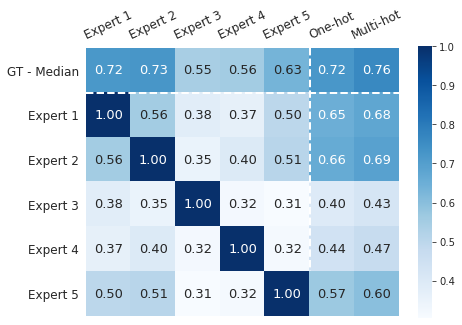

In [8]:
table_df = get_table_metric(public_df, 'kendall', if_highlight=False, bin_list1=False, bin_list2=False)
table_df = table_df[['Expert_1', 'Expert_2', 'Expert_3',  'Expert_4',  'Expert_5', 'Softmax_mean', 'Multi-hot_mean']]

Row_list =[]
for index, rows in table_df.iterrows():
    my_list =[rows['Expert_1'], rows['Expert_2'], rows['Expert_3'], rows['Expert_4'], rows['Expert_5'], rows['Softmax_mean'], rows['Multi-hot_mean']]
    Row_list.append(my_list)

plot_corr_map(Row_list, save_path=None, masking=False, cmap = 'Blues')

## amae

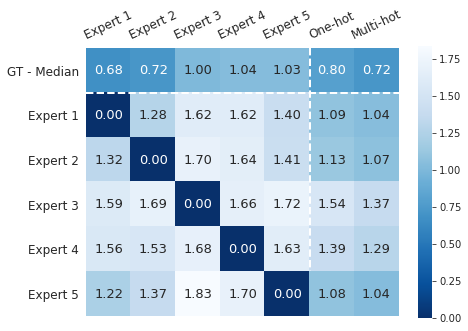

In [9]:
table_df = get_table_metric(public_df, 'amae', if_highlight=False, bin_list1=False, bin_list2=False)
table_df = table_df[['Expert_1', 'Expert_2', 'Expert_3',  'Expert_4',  'Expert_5', 'Softmax_mean', 'Multi-hot_mean']]

Row_list =[]
for index, rows in table_df.iterrows():
    my_list =[rows['Expert_1'], rows['Expert_2'], rows['Expert_3'], rows['Expert_4'], rows['Expert_5'], rows['Softmax_mean'], rows['Multi-hot_mean']]
    Row_list.append(my_list)

plot_corr_map(Row_list, save_path=None, masking=False, cmap = 'Blues_r')

# Expert and model agreement on private test set.

In [10]:
private_df_with_ranks = make_ranks_from_private(private_df)    
private_df_with_ranks

,Filename,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,If_cancer,If_interval_cancer,If_large_invasive_cancer,If_composite,...,final_score_softmax_1,final_pred_softmax_2,final_score_softmax_2,final_pred_softmax_3,final_score_softmax_3,final_pred_softmax_4,final_score_softmax_4,final_pred_softmax_5,final_score_softmax_5,Label
0,private_1.png,295.0,361.0,381.0,324.0,179.0,1,0,0,0,...,0.695442,383.0,0.692052,374.0,0.691982,395.0,0.713099,368.0,0.676593,324
1,private_2.png,62.0,209.0,54.0,216.0,74.0,1,0,1,1,...,0.451249,161.0,0.445096,145.0,0.431995,138.0,0.420622,154.0,0.442789,74
2,private_3.png,218.0,204.0,11.0,400.0,466.0,1,1,0,1,...,0.562080,245.0,0.557815,237.0,0.556553,219.0,0.543189,236.0,0.547489,218
3,private_4.png,26.0,15.0,29.0,29.0,13.0,0,0,0,0,...,0.224576,30.0,0.193673,29.0,0.200577,44.0,0.222148,59.0,0.246102,26
4,private_5.png,63.0,73.0,34.0,7.0,15.0,1,1,0,1,...,0.207389,46.0,0.218514,32.0,0.204828,31.0,0.204529,51.0,0.230849,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,private_471.png,156.0,130.0,84.0,196.0,85.0,0,0,0,0,...,0.341549,105.0,0.325084,101.0,0.321822,118.0,0.373113,95.0,0.315988,130
471,private_472.png,11.0,41.0,126.0,17.0,65.0,1,0,1,1,...,0.206180,20.0,0.158986,33.0,0.207732,43.0,0.221830,44.0,0.215111,41
472,private_473.png,441.0,309.0,246.0,355.0,435.0,1,0,0,0,...,0.740333,440.0,0.756445,424.0,0.743466,431.0,0.754339,422.0,0.740251,355
473,private_474.png,162.0,186.0,157.0,278.0,175.0,0,0,0,0,...,0.571749,232.0,0.546040,236.0,0.555441,263.0,0.586824,232.0,0.545798,175


In [11]:
private_df

,Filename,Expert_1,Expert_2,Expert_3,Expert_4,Expert_5,If_cancer,If_interval_cancer,If_large_invasive_cancer,If_composite,...,final_pred_softmax_1,final_score_softmax_1,final_pred_softmax_2,final_score_softmax_2,final_pred_softmax_3,final_score_softmax_3,final_pred_softmax_4,final_score_softmax_4,final_pred_softmax_5,final_score_softmax_5
0,private_1.png,321,388,407,327,201,1,0,0,0,...,6,0.695442,6,0.692052,6,0.691982,8,0.713099,6,0.676593
1,private_2.png,72,236,57,218,80,1,0,1,1,...,4,0.451249,4,0.445096,4,0.431995,4,0.420622,4,0.442789
2,private_3.png,244,231,11,403,494,1,1,0,1,...,5,0.562080,5,0.557815,4,0.556553,4,0.543189,4,0.547489
3,private_4.png,30,17,30,28,13,0,0,0,0,...,2,0.224576,2,0.193673,2,0.200577,2,0.222148,1,0.246102
4,private_5.png,73,89,35,6,16,1,1,0,1,...,2,0.207389,2,0.218514,2,0.204828,2,0.204529,2,0.230849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,private_471.png,179,155,91,197,91,0,0,0,0,...,3,0.341549,2,0.325084,3,0.321822,4,0.373113,2,0.315988
471,private_472.png,11,50,142,16,70,1,0,1,1,...,1,0.206180,2,0.158986,2,0.207732,2,0.221830,2,0.215111
472,private_473.png,470,336,268,358,463,1,0,0,0,...,8,0.740333,8,0.756445,8,0.743466,8,0.754339,8,0.740251
473,private_474.png,185,213,177,280,197,0,0,0,0,...,5,0.571749,5,0.546040,5,0.555441,5,0.586824,5,0.545798


## kendall

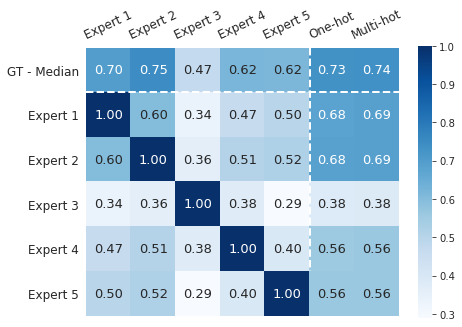

In [12]:
table_df = get_table_metric(private_df_with_ranks, 'kendall', if_highlight=False, bin_list1=False, bin_list2=False)
table_df = table_df[['Expert_1', 'Expert_2', 'Expert_3',  'Expert_4',  'Expert_5', 'Softmax_mean', 'Multi-hot_mean']]

Row_list =[]
for index, rows in table_df.iterrows():
    my_list =[rows['Expert_1'], rows['Expert_2'], rows['Expert_3'], rows['Expert_4'], rows['Expert_5'], rows['Softmax_mean'], rows['Multi-hot_mean']]
    Row_list.append(my_list)

plot_corr_map(Row_list, save_path=None, masking=False, cmap = 'Blues')

## amae 

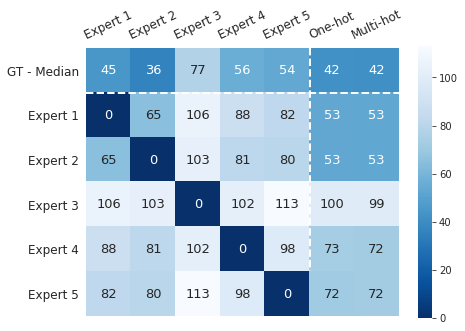

In [13]:
table_df = get_table_metric(private_df_with_ranks, 'amae', if_highlight=False, bin_list1=False, bin_list2=False)
table_df = table_df[['Expert_1', 'Expert_2', 'Expert_3',  'Expert_4',  'Expert_5', 'Softmax_mean', 'Multi-hot_mean']]

Row_list =[]
for index, rows in table_df.iterrows():
    my_list =[rows['Expert_1'], rows['Expert_2'], rows['Expert_3'], rows['Expert_4'], rows['Expert_5'], rows['Softmax_mean'], rows['Multi-hot_mean']]
    Row_list.append(my_list)

plot_corr_map(Row_list, save_path=None, masking=False, cmap = 'Blues_r', fmt='.0f')

# AUC on downstream clinical tasks public and private test sets combined.

In [14]:
combined_df = pd.concat([public_df, private_df])
combined_df = combined_df[['Filename', 'If_cancer', 'If_interval_cancer', 'If_large_invasive_cancer', 'If_composite', 'Dicom_image_laterality', 'Dicom_window_center', 'Dicom_window_width', 'Dicom_photometric_interpretation', 'Libra_percent_density', 'Libra_dense_area', 'Libra_breast_area', 'final_pred_multihot_1', 'final_score_multihot_1', 'final_pred_multihot_2', 'final_score_multihot_2', 'final_pred_multihot_3', 'final_score_multihot_3', 'final_pred_multihot_4', 'final_score_multihot_4', 'final_pred_multihot_5', 'final_score_multihot_5', 'final_pred_softmax_1', 'final_score_softmax_1', 'final_pred_softmax_2', 'final_score_softmax_2', 'final_pred_softmax_3', 'final_score_softmax_3', 'final_pred_softmax_4', 'final_score_softmax_4', 'final_pred_softmax_5', 'final_score_softmax_5']]
combined_df

,Filename,If_cancer,If_interval_cancer,If_large_invasive_cancer,If_composite,Dicom_image_laterality,Dicom_window_center,Dicom_window_width,Dicom_photometric_interpretation,Libra_percent_density,...,final_pred_softmax_1,final_score_softmax_1,final_pred_softmax_2,final_score_softmax_2,final_pred_softmax_3,final_score_softmax_3,final_pred_softmax_4,final_score_softmax_4,final_pred_softmax_5,final_score_softmax_5
0,test_1.png,0,0,0,0,L,2047,4096,MONOCHROME2,22.910905,...,3,0.369708,3,0.334078,3,0.352861,4,0.360887,4,0.354106
1,test_2.png,1,1,1,1,L,2047,4096,MONOCHROME2,10.744111,...,4,0.436586,4,0.375917,4,0.401142,3,0.422172,3,0.352862
2,test_3.png,1,0,0,0,L,2047,4096,MONOCHROME2,27.862025,...,8,0.845576,8,0.833256,8,0.848791,8,0.835598,8,0.820799
3,test_4.png,0,0,0,0,L,2047,4096,MONOCHROME2,10.673160,...,4,0.510477,4,0.456911,5,0.513239,4,0.474639,4,0.459291
4,test_5.png,0,0,0,0,L,2047,4096,MONOCHROME2,9.860717,...,4,0.432414,4,0.400916,4,0.390921,4,0.380318,3,0.380024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,private_471.png,0,0,0,0,L,2047,4096,MONOCHROME2,17.087469,...,3,0.341549,2,0.325084,3,0.321822,4,0.373113,2,0.315988
471,private_472.png,1,0,1,1,R,2047,4096,MONOCHROME2,7.138003,...,1,0.206180,2,0.158986,2,0.207732,2,0.221830,2,0.215111
472,private_473.png,1,0,0,0,R,2047,4096,MONOCHROME2,26.279429,...,8,0.740333,8,0.756445,8,0.743466,8,0.754339,8,0.740251
473,private_474.png,0,0,0,0,L,2047,4096,MONOCHROME2,18.962289,...,5,0.571749,5,0.546040,5,0.555441,5,0.586824,5,0.545798


In [15]:
get_table_metric_downstream_auc(combined_df, if_highlight=True)

,AUC,If_interval_cancer,If_large_invasive_cancer,If_composite,If_interval_cancer_mean,If_large_invasive_cancer_mean,If_composite_mean
0,onehot,0.6309 +- 0.0029,0.5884 +- 0.0022,0.6163 +- 0.0019,0.630900,0.588400,0.616300
1,multihot,0.6306 +- 0.0021,0.5865 +- 0.0029,0.6153 +- 0.0031,0.630600,0.586500,0.615300
2,Libra_percent_density,0.594676,0.525382,0.567786,0.594700,0.525400,0.567800
3,Libra_dense_area,0.590119,0.550460,0.583875,0.590100,0.550500,0.583900
4,Libra_breast_area,0.446294,0.506486,0.480354,0.446300,0.506500,0.480400


# Odds ratio on clinical endpoints with public and private test sets combined.

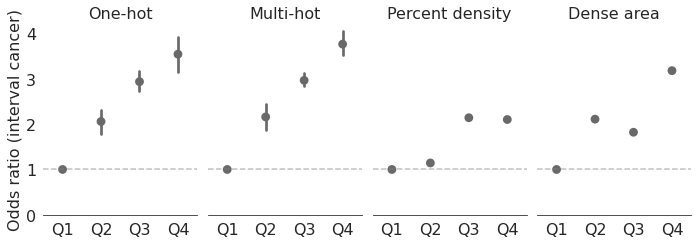

In [16]:
combined_df = df_score_to_bin(combined_df)
plot_df = get_oddsratio_plots(df=combined_df,save_path=None,target='interval',metric='oddsratio')

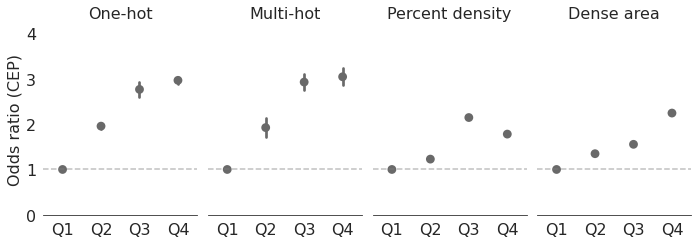

In [17]:
plot_df = get_oddsratio_plots(df=combined_df,save_path=None,target='composite',metric='oddsratio')

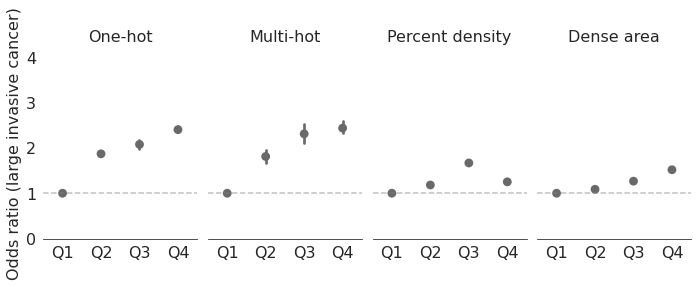

In [18]:
plot_df = get_oddsratio_plots(df=combined_df,save_path=None,target='largeinvasive',metric='oddsratio')

In [19]:
get_table_metric_downstream_oddsratio(df=combined_df,target='interval',metric='oddsratio')

,softmax,multi-hot,softmax_mean,multi-hot_mean,Libra_percent_density,Libra_dense_area,Libra_breast_area
0,1,1,1.000000,1.000000,1.000000,1.000000,1.000000
1,2.0583 +- 0.3025,2.1586 +- 0.3463,2.058300,2.158600,1.143400,2.110100,0.613200
2,2.9368 +- 0.2633,2.9662 +- 0.1703,2.936800,2.966200,2.141500,1.821300,0.646800
3,3.5429 +- 0.4492,3.7652 +- 0.3085,3.542900,3.765200,2.101900,3.179300,0.602300


In [20]:
get_table_metric_downstream_oddsratio(df=combined_df,target='composite',metric='oddsratio')

,softmax,multi-hot,softmax_mean,multi-hot_mean,Libra_percent_density,Libra_dense_area,Libra_breast_area
0,1,1,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.9556 +- 0.0814,1.9238 +- 0.2438,1.955600,1.923800,1.228500,1.347800,0.848800
2,2.7665 +- 0.1803,2.9280 +- 0.1969,2.766500,2.928000,2.145500,1.554800,0.848800
3,2.9662 +- 0.0849,3.0448 +- 0.2102,2.966200,3.044800,1.780100,2.244300,0.904900


In [21]:
get_table_metric_downstream_oddsratio(df=combined_df,target='interval',metric='pvalue')

,softmax,multi-hot,softmax_mean,multi-hot_mean,Libra_percent_density,Libra_dense_area,Libra_breast_area
0,1,1,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.0612 +- 0.0442,0.0522 +- 0.0409,0.061200,0.052200,0.427600,0.027700,0.962600
2,0.0027 +- 0.0013,0.0027 +- 0.0012,0.002700,0.002700,0.013700,0.074100,0.947200
3,0.0004 +- 0.0005,0.0001 +- 0.0001,0.000400,0.000100,0.015900,0.000400,0.967300


In [22]:
get_table_metric_downstream_oddsratio(df=combined_df,target='composite',metric='pvalue')

,softmax,multi-hot,softmax_mean,multi-hot_mean,Libra_percent_density,Libra_dense_area,Libra_breast_area
0,1,1,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.0110 +- 0.0041,0.0215 +- 0.0156,0.011000,0.021500,0.256700,0.152000,0.793200
2,0.0001 +- 0.0001,0.0001 +- 0.0001,0.000100,0.000100,0.001100,0.051900,0.793200
3,0.0000 +- 0.0000,0.0000 +- 0.0000,0.000000,0.000000,0.013000,0.000500,0.708400


# Variations in different masking levels using percent density as a proxy on public test set.

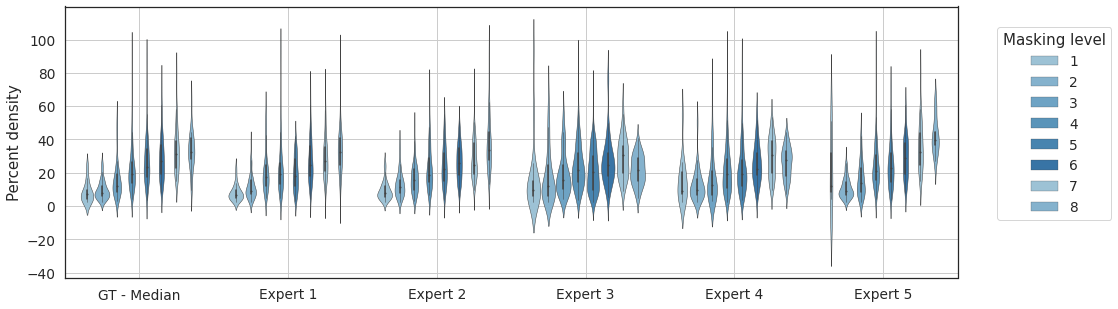

In [23]:
make_variations_violin_plot(public_df, save_path=None)   

# Expert and model agreement in different masking levels on public test set.

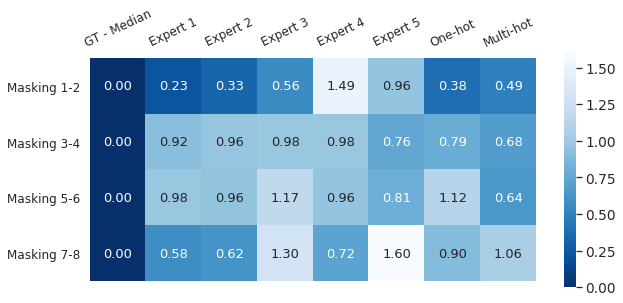

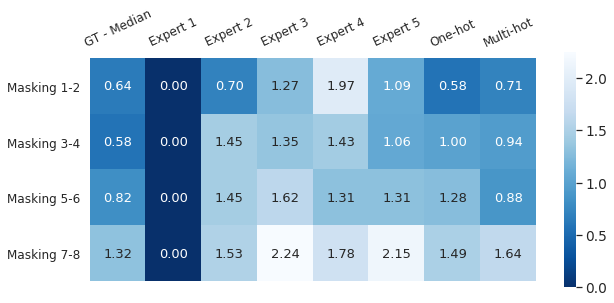

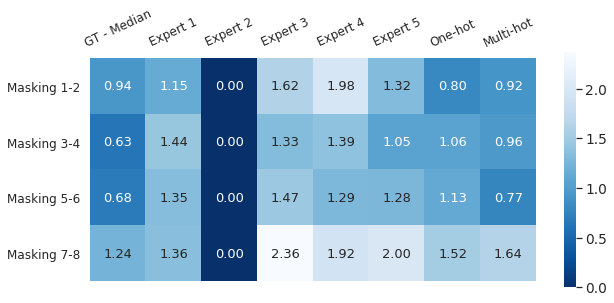

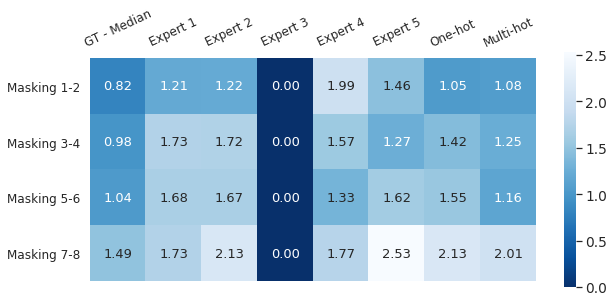

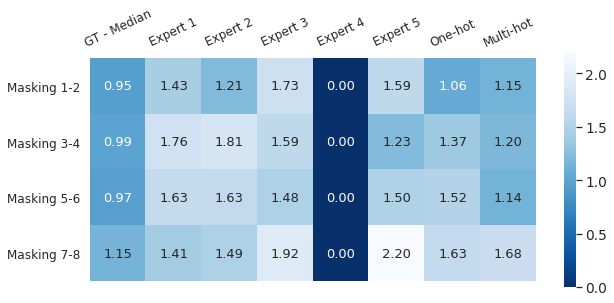

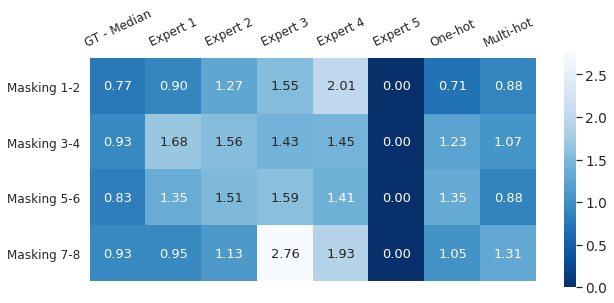

In [24]:
for gt_column in ['Label', 'Expert_1', 'Expert_2', 'Expert_3', 'Expert_4', 'Expert_5']:
    rows = ['Label', 'Expert_1', 'Expert_2', 'Expert_3', 'Expert_4', 'Expert_5', 'One-hot', 'Multi-hot']
    columns = ['Masking 1-2', 'Masking 3-4', 'Masking 5-6', 'Masking 7-8']
    all_list = get_metric_seperate_masking_levels(public_df, gt_column, rows, columns, 'amae')
    plot_metric_seperate_masking_levels(all_list, save_path=None, vmax=None, cmap='Blues_r', fmt=".2f")